In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [36]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
measurements = base.classes.measurement
station = base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

engine.execute('SELECT * FROM station').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.

#perform the query first and then order by descending dates
session.query(measurements.date).order_by(measurements.date.desc()).first().date

'2017-08-23'

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

session.query(measurements.date).order_by(measurements.date).first().date

# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(year_ago)



2016-08-23


In [38]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
year_prcp = session.query(measurements.date, measurements.prcp).filter(measurements.date >= year_ago, measurements.prcp != None).\
    order_by(measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '2017-07-02'),
  Text(0.0, 0, '2016-08-23'),
  Text(250.0, 0, '2016-10-05'),
  Text(500.0, 0, '2016-11-16'),
  Text(750.0, 0, '2016-12-31'),
  Text(1000.0, 0, '2017-02-13'),
  Text(1250.0, 0, '2017-03-31'),
  Text(1500.0, 0, '2017-05-14'),
  Text(1750.0, 0, '2017-06-28'),
  Text(2000.0, 0, '2017-08-17'),
  Text(2250.0, 0, '')])

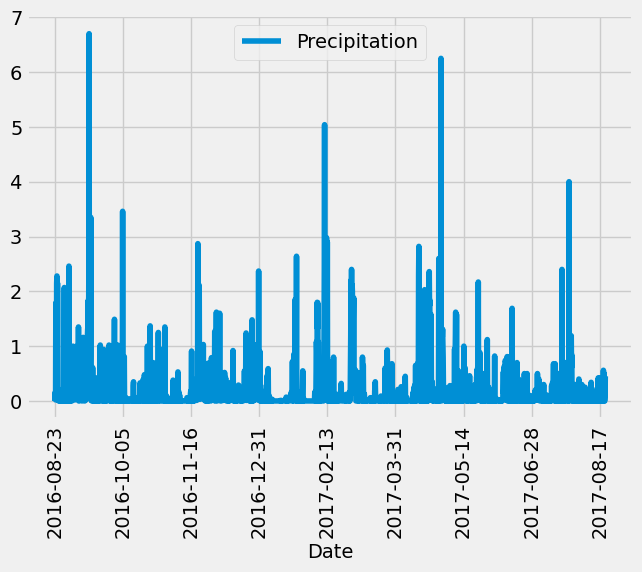

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(7,5))
plt.tight_layout()
plt.xticks(rotation='vertical')

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

#[(9,)]

9

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
#List the stations and their counts in descending order.
all_stations = session.query(measurements.station, func.count(measurements.station)).\
            group_by(measurements.station).\
            order_by(func.count(measurements.station).desc()).all()
all_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).\
                filter(measurements.station == 'USC00519281').order_by(func.min(measurements.tobs)).all()
most_active


[(54.0, 85.0, 71.66378066378067)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_year = session.query(measurements.tobs).\
      filter(measurements.date >= year_ago, measurements.station == 'USC00519281').\
      order_by(measurements.tobs).all()

#set to a dataframe

most_active_year_df = pd.DataFrame(most_active_year, columns = ["Tobs"])

x = [y[0] for y in most_active_year_df]

most_active_year_df.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


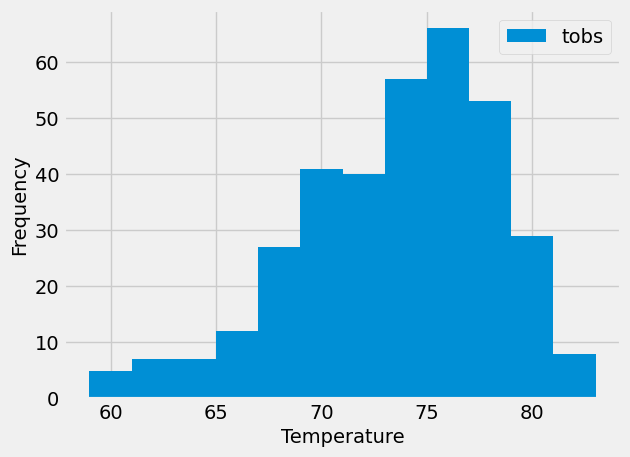

In [87]:
#Plot results as a histogram
bins = 12
plt.hist(most_active_year_df, bins)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc=0)

# Close Session

In [80]:
# Close Session
session.close()